# Project 6  - K mean clustering - using Julia
## Nhi Le
## DATA 4319 

K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-means is a clustering algorithm that groups the elements of a dataset into k distinct clusters (hence the k in the name). Here is how it works:
1. Choose k random points, called centroids, from the feature space, which will represent the center of each of the k clusters.
2. Assign each sample of the dataset (that is, each point in the feature space) to the cluster with the closest centroid.
3. For each cluster, we recomputed new centroids by taking the mean values of all the points in the cluster.
4. With the new centroids, we repeat steps 2 and 3 until the stopping criteria is met.


 **The objective function is:**

![](https://miro.medium.com/max/822/1*myXqNCTZH80uvO2QyU6F5Q.png)

where wik=1 for data point xi if it belongs to cluster k; otherwise, wik=0. Also, μk is the centroid of xi’s cluster.

In [1]:
#Using Package
using Statistics
using Plots

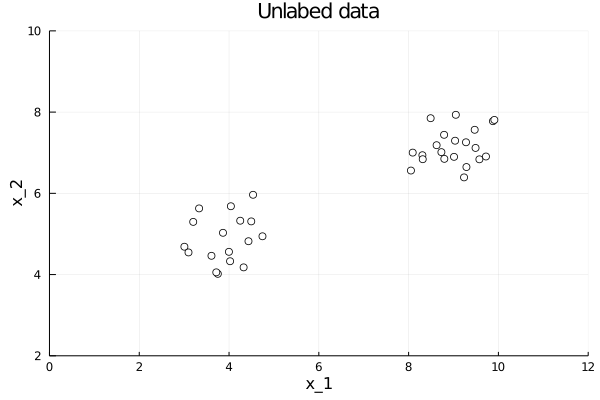

In [2]:
#generate random data
function circleShape(h,k,r)
    θ = LinRange(0,2*π, 500)
    return h.+r*sin.(θ), k.+ r*cos.(θ)
    end 

cluster1 = [(4 + (-1)^rand(1:2)*rand(), 5 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]

cluster2 = [(9 + (-1)^rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]


data = copy(cluster1)
for x in cluster2
    push!(data,x)
end

plot(legend = false, 
xlabel = "x_1", 
xlim = (0,12), 
ylabel = "x_2",
ylim = (2,10),
title = "Unlabed data")

scatter!(data,color = "white")

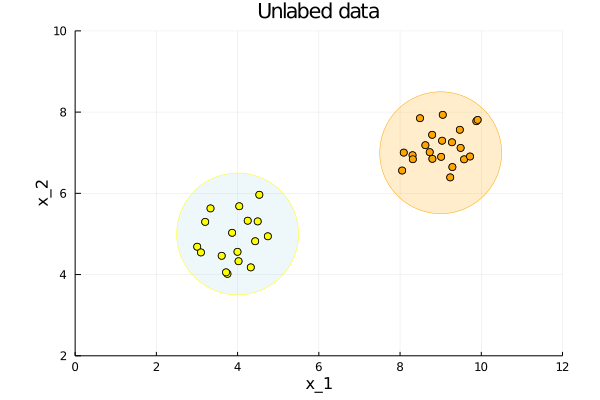

In [3]:
plot!(circleShape(4, 5, 1.5),
        seriestype = [:shape,],
        lw=0.5,
        c="lightblue",
        legend=false,
        linecolor="yellow",
        fillalpha=0.2,
        aspect_ratio=1)

plot!(circleShape(9, 7, 1.5),
        seriestype = [:shape,],
        lw=0.5,
        c="orange",
        legend=false,
        linecolor="orange",
        fillalpha=0.2,
        aspect_ratio=1)

scatter!(cluster1,color = "yellow")
scatter!(cluster2,color = "orange")

The euclidean distance formula and it is represented below equation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/a0ef4fe055b2a51b4cca43a05e5d1cd93f758dcc)
![](https://www.gstatic.com/education/formulas2/-1/en/euclidean_distance.svg)

The euclidean distance formula is used to find the distance between points and classify them based on how far and close they are from the given point and centroids. We will use this for every point in the with each centroid that we use.

In [4]:
function euclidean_distance(p1,p2)
    return sqrt(sum([(p1[i]-p2[i])^2 for i =1:length(p1)]))
end

euclidean_distance (generic function with 1 method)

In [5]:
function k_means_distance(X, centroids, k)
    distances = Dict()
    for p in X
        temp_dict = Dict()
        for i = 1:k
            temp_dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_dict
    end
    return distances
end

k_means_distance (generic function with 1 method)

In [6]:
function k_mean_clusters(X, centroids , k)
    distances = k_means_distance(X, centroids , k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
                min_d = distances[p][i]
                end 
            end 
        end 
    return clusters
end

k_mean_clusters (generic function with 1 method)

In [7]:
function k_mean_new_centroids(X,centroids, k)
    clusters = k_mean_clusters(X,centroids,k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x,y)
        push!(new_centers, point)
        end 
    return new_centers
end

k_mean_new_centroids (generic function with 1 method)

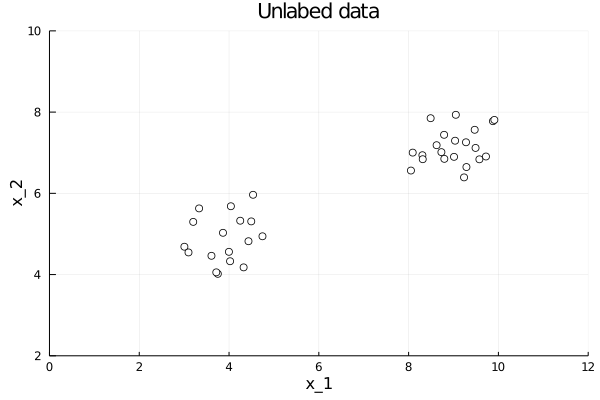

In [8]:
plot(legend = false, 
xlabel = "x_1", 
xlim = (0,12), 
ylabel = "x_2",
ylim = (2,10),
title = "Unlabed data")

scatter!(data,color = "white")

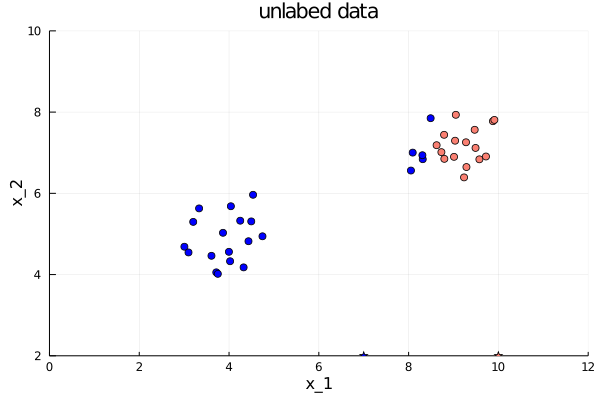

In [9]:
#create random new center points
initial_centers = [(rand(1:10),rand(1:10)),(rand(1:10),rand(1:10))]
#Classify points in these random new clusters
clusters = k_mean_clusters(data, initial_centers,2)

#Plot the data with the clusters with classification colors. 
plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([initial_centers[1]], color = "salmon", shape = :star5)
scatter!([initial_centers[2]], color = "blue", shape = :star5)

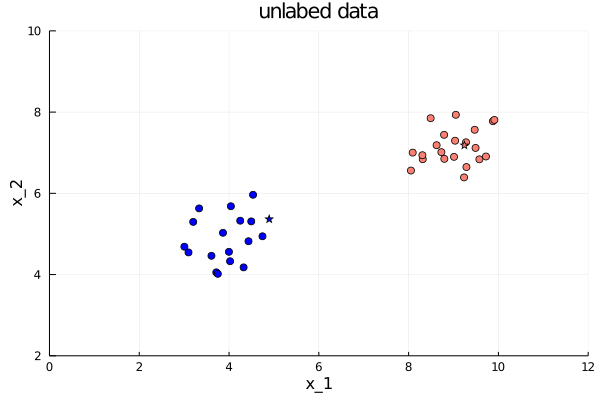

In [10]:
centroids_test1 = k_mean_new_centroids(data, initial_centers, 2)

clusters = k_mean_clusters(data,centroids_test1, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test1[1]], color = "salmon", shape = :star5)
scatter!([centroids_test1[2]], color = "blue", shape = :star5)

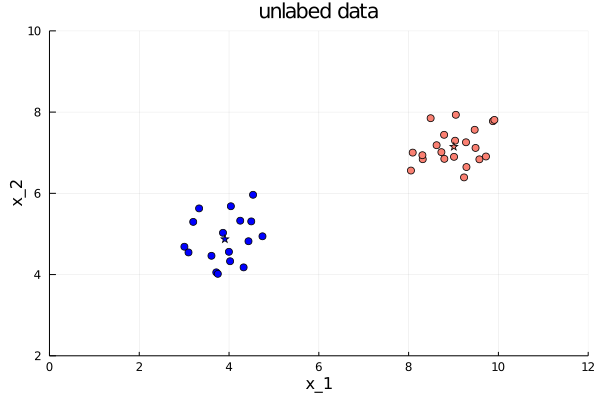

In [11]:
centroids_test2 = k_mean_new_centroids(data, centroids_test1, 2)

clusters = k_mean_clusters(data,centroids_test2, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test2[1]], color = "salmon", shape = :star5)
scatter!([centroids_test2[2]], color = "blue", shape = :star5)

### Conclusion
K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.